# Computing Bayes factor

A Bayes factor is a metric to compare the amount of evidence for a given hypothesis relative to another. The Bayes theorem is as follows:

$$
P(\Theta|y) = \frac{P(y|\Theta)P(\Theta)}{P(y)}
$$

Where:
- $P(\Theta|y)$ is the posterior distribution of the probability of the values of our parameters of interest given the data we have observed
- $P(y|\Theta)$ is the likelihood of our data given the parameters of interest
- $P(\Theta)$ is the prior distribution of those parameters
- $P(y)$ is the model evidence

The model evidence depends on both the likelihood of the data and the prior, because it is computed as:

$$
P(y) = \int P(y|\Theta)P(\Theta)d\Theta
$$

In other words, to computhe model evidence, we need to integrate the probability of the likelihood times the prior for every possible values of $Theta$. In the Bayesian framework, comparing two hypotheses (or models) consists in taking the ratio of the evidence $P(y)$ for each of these models. Hypotheses are stated as different prior distributions, and the bayes factor is calculated as:

$$
BF_{01} = \frac{P(y|M_0)}{P(y|M_1)}
$$

Where $P(y|M_0)$ and $P(y|M_1)$ are the model evidence given the prior of hypothesis 0 and hypothesis 1 respectively.

In null hypothesis statistical testing (NHST), we are comparing a null hypothesis about the absence of an effect, against the alternative hypothesis of the presence of an effect, or the presence of an effect in a particular direction. The closest approach in a Bayesian framework is to compute the Bayes factor between a 'point null hypothesis', which states that the probability of getting an effect equal to 0 is 1 (i.e. null hypothesis), against an alternative hypothesis that specifies a less constrained prior, such that values others than 0 do not have a probability of 0 (as is the case in the null hypothesis). There are many ways to specify this alternative hypothesis: it can be a uniform prior (i.e. all values are equally likely), a signed prior (positive effects are more likely than negative effect, which would be similar to a signed frequentist test), a weakly informative prior that states that very extreme values are less likely, or informed by knowledge in the field.

One of the issue to compute the Bayes factor is that because of the integral, there is often no analytical solution to compute the model evidence under each prior, in which case it is not possible to compute the ration between two hypotheses. Thankfully, for very standard frequentist tests, statisticians have been able to resolve this issue on the case by case and find analytical solution to compute a Bayes factor that is equivalent to the kind of tests performed in NHST. In this repo, we will present Bayes factors calculations for the following tests:

- Binomial test: test whether decoding accuracy in a single subject is significantly* above chance (iEEG)
- JZS Bayes t-test: test whether the difference between two groups (paired or not) is significantly* above chance (MEEG: group level decoding, synchrony...)
- Kendall's tau Bayes factors: test the correlation between an observed and model matrix as in the case of the RSA (iEEG and maybe MEG)

* The term significantly is here used colloquially, as the term 'significance' is tied to NHST, not Bayesian inference. In the case of Bayesian inference though, we would typically use some arbitrary thresholding to decide what to consider relevant (BF > 3)

# Binomial test
In the case of the binomial test, there is an analytical solution to the model evidence. In the case of a binomial test, we want to infer the probability of success (probability of correctly predicting the target label) based on our observed number of success. With this model, the likelihood is a binomial distribution, and the prior is a beta distribution. The integral of a binomial distribution multiplied by a beta distribution simplifies to:

$$p(y) = \binom{N}{k} \frac{\boldsymbol{B}(\alpha + h, \beta + n - h)}{\boldsymbol{\alpha, \beta}}$$

Where:
- $\boldsymbol{B}$ is the beta function
- $n$ is the number of trials
- $h$ is the number of success

When computing the Bayes factor, we take the ration $\frac{p(y|M_0)}{p(y|M_1)}$. For both models, the $\binom{N}{k}$ term is the same, so we can omit it, since it will cancel out. So we can write the simplified formulae of the model evidence as:

In [2]:
from scipy.special import betaln
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt


def beta_binom(prior, y):
    """
    Compute the marginal likelihood, analytically, for a beta-binomial model.

    prior : tuple
        tuple of alpha and beta parameter for the prior (beta distribution)
    y : array
        array with "1" and "0" corresponding to the success and fails respectively
    """
    alpha, beta = prior
    h = np.sum(y)
    n = len(y)
    p_y = np.exp(betaln(alpha + h, beta + n - h) - betaln(alpha, beta))
    return p_y

Now we only need to select our priors on the beta distribution to have the null hypothesis being 0 and the alternative being a uniform prior:

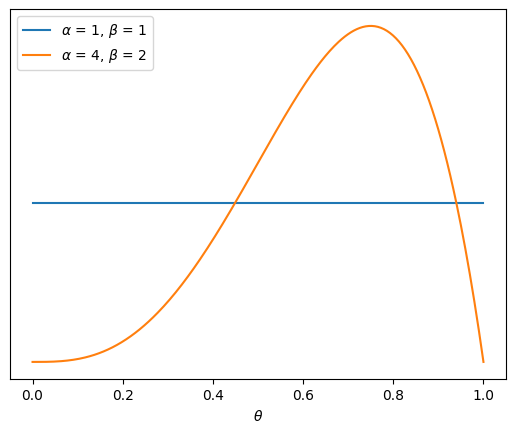

In [6]:
y = np.repeat([1, 0], [50, 50])  # 50 "heads" and 50 "tails"
priors = ((1, 1), (4,  2))

for a, b in priors:
    distri = beta(a, b)
    x = np.linspace(0, 1, 300)
    x_pdf = distri.pdf(x)
    plt.plot(x, x_pdf, label=rf"$\alpha$ = {a:d}, $\beta$ = {b:d}")
    plt.yticks([])
    plt.xlabel("$\\theta$")
    plt.legend()